In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

### Loading the original image

shape of the image: (128, 128)


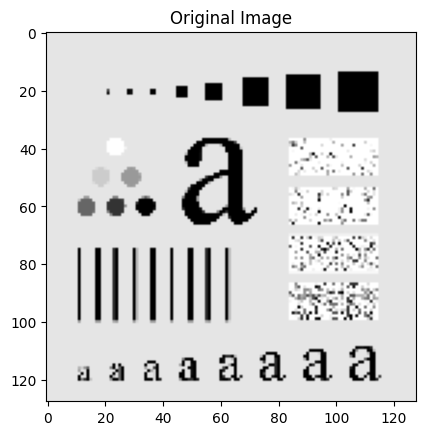

min pixel intensity: 0
max pixel intensity: 255


In [11]:
#original_image = cv2.imread('./images/flower.jpg',cv2.IMREAD_GRAYSCALE)
original_image= cv2.imread('./images/Characters_Test_Pattern.tif',0)
original_image = cv2.resize(original_image, (128, 128))
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

The DFT equation for 2D Image.
$$
F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-j 2 \pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$

### Funciton for DFT (spatial Domain to Frequency Domain)

In [12]:
def cal_dft(image):
    height, width = image.shape
    M, N = height, width
    dft_result = np.zeros((height, width), dtype=complex)
    
    for u in range(M):
        for v in range(N):
            sum_complex = 0
            for x in range(M):
                for y in range(N):
                    pixel_val = image[x,y]
                    sum_complex += np.exp(-2j * np.pi * ((u * x / M) + (v * y / N)))
            dft_result[u,v] = sum_complex
    
    return dft_result                
                

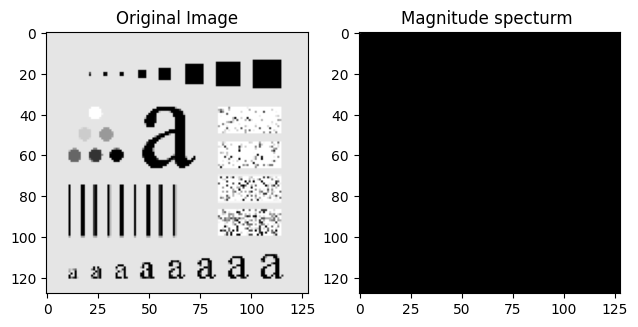

In [13]:
dft_result = cal_dft(original_image)
magnitude = np.abs(dft_result)
magnitude_spectrum = np.log10(1 + magnitude)

# plt.figure(figsize=(12,6))

#original image
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')

#magnitude specturm of original image
plt.subplot(1,2,2)
plt.title('Magnitude specturm ')
plt.imshow(magnitude_spectrum, cmap='gray')

plt.tight_layout()
plt.show()

The IDFT equation.
$$
f(x, y) = \frac{1}{MN} \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u, v) \cdot e^{j 2\pi \left( \frac{ux}{M} + \frac{vy}{N} \right)}
$$


### Funciton for IDFT (Frequency Domain to spatial Domain)

In [14]:
def cal_idft(frequency_image):
    height, width = frequency_image.shape
    M, N = height, width
    reconstructed_image = np.zeros((height, width), dtype=complex)
    
    for x in range(M):
        for y in range(N):
            sum_complex = 0
            for u in range(M):
                for v in range(N):
                    sum_complex += np.exp(2j * np.pi * ((u * x / M) + (v * y / N)))
                    sum_complex *= frequency_image[u,v]
        reconstructed_image[x,y] = sum_complex / (M*N)
    
    # take teh ral part of the result(image is real-valued)
    reconstructed_image = np.abs(reconstructed_image)               
    
    return reconstructed_image

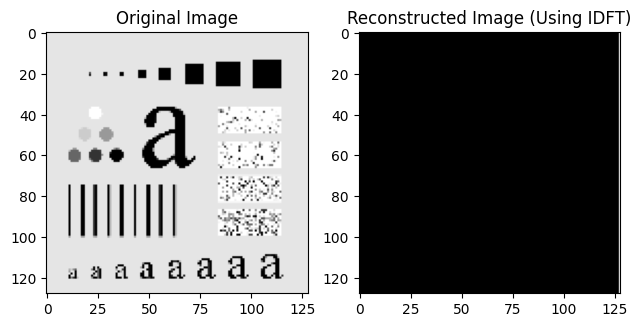

In [15]:
reconstructed_image = cal_idft(dft_result)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image (Using IDFT)")
plt.imshow(reconstructed_image, cmap='gray')

plt.tight_layout()
plt.show()